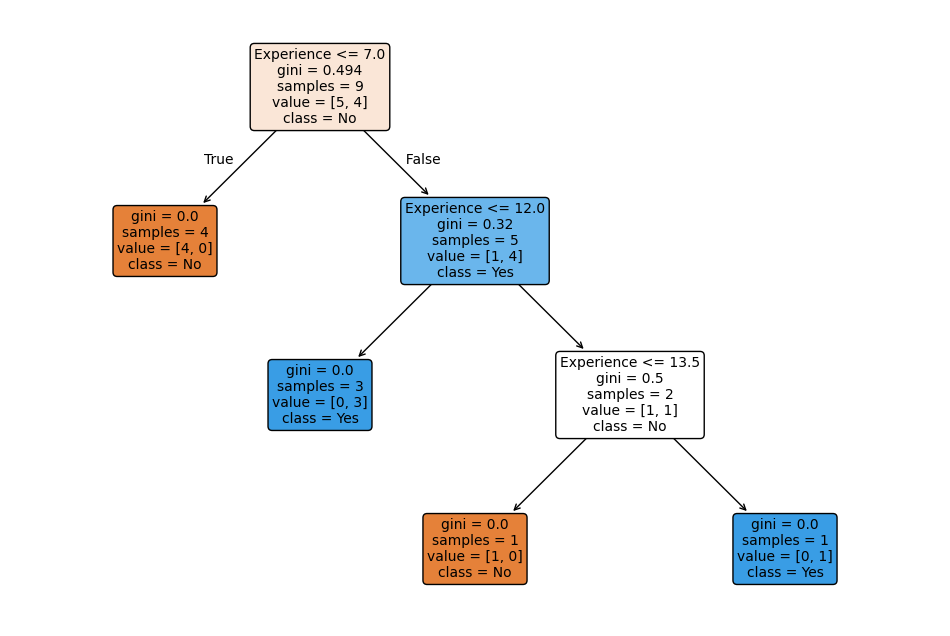

|--- Experience <= 7.00
|   |--- class: 0
|--- Experience >  7.00
|   |--- Experience <= 12.00
|   |   |--- class: 1
|   |--- Experience >  12.00
|   |   |--- Experience <= 13.50
|   |   |   |--- class: 0
|   |   |--- Experience >  13.50
|   |   |   |--- class: 1



In [1]:
import pandas
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pandas.read_csv("TempData.csv")

# Map categorical data in the 'Nationality' column to numerical values
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

# Map categorical data in the 'Go' column to numerical values
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# Define the features (input variables) and target variable
features = ['Age', 'Experience', 'Rank', 'Nationality']  # Columns to be used as features
X = df[features]  # Input features
y = df['Go']  # Target variable

# Initialize the decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the decision tree classifier on the data
dtree = dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the plot
plot_tree(
    dtree, 
    feature_names=features,  # Display feature names
    class_names=['No', 'Yes'],  # Display class names for target variable
    filled=True,  # Fill nodes with colors representing the classes
    rounded=True,  # Use rounded corners for the boxes
    fontsize=10  # Set font size
)
plt.show()  # Show the plot

# Print a textual representation of the decision tree
print(export_text(dtree, feature_names=features))




This cell loads a dataset, preprocesses categorical data, trains a decision tree classifier, and visualises the resulting model. The decision tree is used to predict the target variable (Go) based on features like Age, Experience, Rank, and Nationality.

In [2]:
# Load the dataset
df = pandas.read_csv("poker-hand-training-true.csv")

# Define the features and target
features = ["S1", "R1", "S2", "R2", "S3", "R3", "S4", "R4", "S5", "R5"]
X_train = df[features]  # Features from training data
y_train = df["Class"]  # Target from training data

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

Tree Depth: 30
Number of Leaves: 9196


## Decision Tree Training Results

### Tree Structure
- **Tree Depth**: 30  
  - The depth of the tree is the longest path from the root node to a leaf node.  
  - A depth of 30 indicates that the tree has grown very deep, creating a highly detailed set of rules for classification.  
  - While this might improve training accuracy, it can lead to **overfitting**, where the model memorizes the training data instead of generalizing patterns.

- **Number of Leaves**: 9196  
  - Leaves are the terminal nodes in the tree where predictions are made.  
  - The tree has 9196 leaves, which suggests it has created a large number of distinct rules to classify the data.  
  - While this level of complexity is expected for a dataset like Poker Hands (due to the many combinations of suits and ranks), it could also indicate **overfitting**.

  ### Addressing Overfitting
To prevent overfitting and improve the model's generalization ability:
1. **Limit the Depth of the Tree**:
   - Restrict the maximum depth of the tree to control its complexity

2. **Limit the Minimum Samples per Leaf**:
   - Set a minimum number of samples required for a leaf node

3. **Prune the Tree**:
   - Use cost-complexity pruning (`ccp_alpha`) to remove overly specific splits


In [3]:
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10,  max_depth=10) # Added cap on depth and minimum samples per leaf
model.fit(X_train, y_train)
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

Tree Depth: 10
Number of Leaves: 684


In [4]:
from sklearn.metrics import accuracy_score

# Get the effective alpha values for pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Display alpha values and corresponding tree impurities
print("Effective Alphas:", ccp_alphas)
print("Impurities for each alpha:", impurities)

Effective Alphas: [0.00000000e+00 0.00000000e+00 3.99840064e-06 3.99840064e-06
 4.36189161e-06 6.05818279e-06 9.79694702e-06 1.19952019e-05
 1.19952019e-05 1.40706181e-05 1.46608023e-05 1.53877843e-05
 1.53885814e-05 1.56820389e-05 1.58302950e-05 1.59936026e-05
 1.59936026e-05 1.61147662e-05 1.72398573e-05 1.86592030e-05
 1.87822307e-05 1.91842455e-05 1.95178845e-05 1.99400759e-05
 2.20517853e-05 2.21278738e-05 2.22727308e-05 2.24152763e-05
 2.37900178e-05 2.39904038e-05 2.42327311e-05 2.54443677e-05
 2.62521254e-05 2.70194952e-05 2.82936934e-05 2.85768046e-05
 2.87884846e-05 3.04120776e-05 3.07901129e-05 3.10178959e-05
 3.11525045e-05 3.23506961e-05 3.29779824e-05 3.32547634e-05
 3.33532164e-05 3.34152053e-05 3.37195404e-05 3.38498419e-05
 3.39604418e-05 3.46082396e-05 3.46458819e-05 3.51076501e-05
 3.55740057e-05 3.59856058e-05 3.59856058e-05 3.61188858e-05
 3.63188058e-05 3.69083136e-05 3.71201634e-05 3.73597973e-05
 3.76964060e-05 3.83684910e-05 3.84067035e-05 3.86685153e-05
 3.899

## Cost Complexity Pruning Results

### Effective Alphas (`ccp_alpha`)
- **Definition**: 
  - The `ccp_alpha` values represent thresholds for pruning the decision tree.
  - Each alpha controls the pruning strength, where larger values prune more nodes, simplifying the tree.
- **Values**:
  - Example values from the dataset:
    ```
    [0.00000000e+00, 2.13248034e-05, 2.33240037e-05, ..., 
     3.76798757e-04, 3.81341428e-04, 4.36344364e-04]
    ```
  - The range begins at `0.00000000e+00` (no pruning) and increases to `4.36344364e-04` (high pruning).

### Impurities for Each Alpha
- **Definition**: 
  - Impurities represent the total impurity (e.g., Gini) of the tree for a given `ccp_alpha`.
  - As pruning increases, the impurity rises because the tree becomes simpler and less specialized.
- **Values**:
  - Example impurity values:
    ```
    [0.00000000e+00, 6.39744102e-05, 1.33946421e-04, ..., 
     5.63369749e-01, 5.63751091e-01, 5.68114534e-01]
    ```
  - At `ccp_alpha = 0.00000000e+00`, the tree is fully grown with no impurity.
  - As `ccp_alpha` increases, the impurity grows, reflecting the tree's simplification.

---

### Interpreting the Results
1. **Alpha Values (`ccp_alpha`)**:
   - **Low Alpha (`0.00000000e+00`)**:
     - The tree is fully grown, with no pruning applied.
     - It likely overfits the training data, resulting in perfect accuracy but poor generalization.
   - **Moderate Alpha (`2.13248034e-05` to `3.81341428e-04`)**:
     - Nodes with minimal contributions to impurity reduction are pruned.
     - The tree becomes simpler, balancing training accuracy and generalization.
   - **High Alpha (`4.36344364e-04`)**:
     - The tree is heavily pruned, with fewer nodes and high impurity.
     - It may underfit the data, leading to poor performance on both training and test sets.

2. **Impurity Values**:
   - **Low Impurity (`0.00000000e+00`)**:
     - At low `ccp_alpha`, the tree is fully grown and fits the training data perfectly.
   - **High Impurity (`5.68114534e-01`)**:
     - At high `ccp_alpha`, the tree is simplified to the point of underfitting, where it lacks the complexity needed to represent the data accurately.


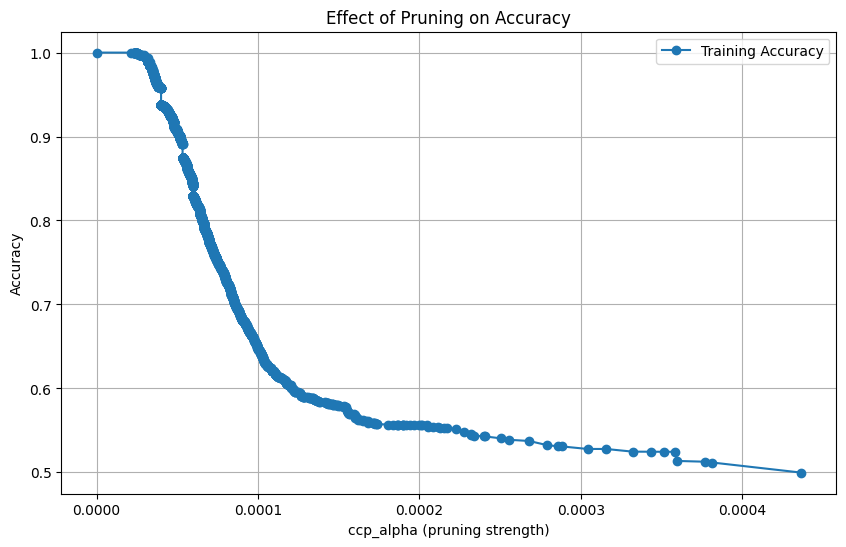

In [16]:
# Train models for each alpha
models = []
train_scores = []

for alpha in ccp_alphas:
    # Train a new tree for each alpha
    pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    models.append(pruned_model)
    
    # Evaluate on training
    train_scores.append(pruned_model.score(X_train, y_train))

# Plot accuracy vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Training Accuracy", marker='o')
plt.xlabel("ccp_alpha (pruning strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Pruning on Accuracy")
plt.legend()
plt.grid()
plt.show()

## Understanding `ccp_alpha` Values for Pruning

### What is `ccp_alpha`?
- **`ccp_alpha`**: A hyperparameter that determines the strength of pruning applied to the decision tree.
- Higher values of `ccp_alpha` prune more nodes from the tree, simplifying its structure.

### What These Numbers Mean
Each value in the array represents a pruning threshold (alpha). As `ccp_alpha` increases:
1. The decision tree removes nodes that add less value to reducing impurity.
2. The tree becomes progressively smaller and simpler.

Example of alpha values:

4.36189161e-06, 6.05818279e-06, 9.79694702e-06, 1.19952019e-05, 
1.19952019e-05, 1.40706181e-05, 1.46608023e-05, 1.53877843e-05, 
1.53885814e-05, 1.56820389e-05, 1.58302950e-05, 1.59936026e-05, 
1.59936026e-05, 1.61147662e-05, 1.72398573e-05, 1.86592030e-05, 
1.87822307e-05, 1.91842455e-05, 1.95178845e-05, 1.99400759e-05

#### Interpreting the Example Set
- **Range**: The values start very small and gradually increase, indicating incremental steps for pruning strength.
- **Magnitude**: The values are small because they represent minimal changes in impurity reduction at each pruning step.

### Why These Values Matter
1. **Tree Impurity vs. Complexity**: Each alpha value corresponds to a tree with a specific impurity level and number of nodes.
2. **Choosing the Optimal Alpha**: The goal is to find the **smallest alpha** that maximizes test accuracy without overfitting the training data.

### Observations from the Pruning Plot

The pruning plot with training accuracy only shows a line starting at 1.0, slowly declining, then dropping sharply to around 0.6, and then gradually descending to 0.5. Here’s what this means:

- **Initial High Accuracy**: At very low `ccp_alpha` values, the tree is highly complex and overfitted, achieving nearly perfect accuracy on training data.
- **Sharp Drop**: As `ccp_alpha` increases, significant pruning begins, and the model starts losing accuracy on the training set, indicating it’s simplifying and removing overfitted details.
- **Gradual Decline to 0.5**: At high `ccp_alpha` values, the tree becomes very shallow, resulting in underfitting, where it lacks complexity to capture patterns in the training data.


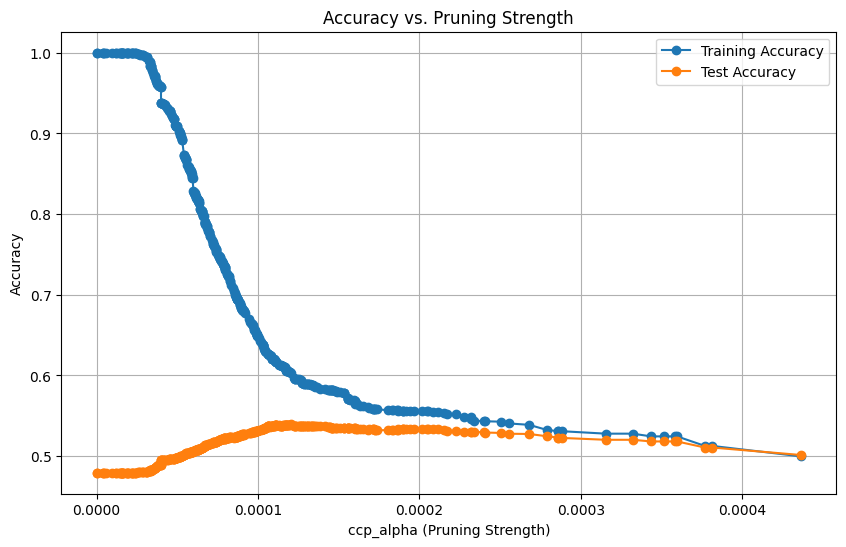

In [5]:
# Load test data
test_data = pandas.read_csv("poker-hand-testing.csv")

# Define features and target for test data
X_test = test_data[features]
y_test = test_data["Class"]

# Initialize lists for storing accuracies
train_scores = []
test_scores = []

# Train and evaluate the tree for each alpha
for alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    
    # Record training and test accuracy
    train_scores.append(pruned_model.score(X_train, y_train))
    test_scores.append(pruned_model.score(X_test, y_test))

    # Plot training and test accuracy vs. pruning strength
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Training Accuracy", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Pruning Strength")
plt.legend()
plt.grid()
plt.show()

## Pruning Results and Analysis

### Observations
1. **Initial High Training Accuracy (1.0)**:
   - When the tree is fully grown (`ccp_alpha = 0`), it perfectly fits the training data.
   - This leads to overfitting, where the model memorizes the training data but cannot generalize to unseen test data.
   - Test accuracy is low (less than 0.5) at this stage.

2. **Peak Test Accuracy (~0.53)**:
   - As pruning strength (`ccp_alpha`) increases, the tree simplifies and begins generalizing better.
   - Test accuracy peaks around a `ccp_alpha` value where the model achieves a good balance between complexity and generalization.

3. **Declining Test Accuracy**:
   - Beyond the optimal pruning point, further pruning makes the tree too simple.
   - Both training and test accuracies converge around 0.5, indicating the model is underfitting and cannot capture meaningful patterns.

---

### Interpretation
1. **Overfitting**:
   - The initial high training accuracy (1.0) and low test accuracy (<0.5) are signs of overfitting.
   - The fully grown tree memorizes the training data, failing to generalize to test data.

2. **Optimal Pruning Strength**:
   - The `ccp_alpha` value where **test accuracy peaks (~0.53)** represents the best pruning strength.
   - At this point, the tree achieves the best balance between fitting the training data and generalizing to unseen data.

3. **Underfitting**:
   - As pruning becomes too aggressive (high `ccp_alpha`), the tree loses complexity and underfits.
   - Training and test accuracies converge (0.5), indicating the tree is too simple to make meaningful predictions.

### Conclusion
- The optimal pruning strength (`ccp_alpha`) provides the best balance between simplicity and generalization.
- By selecting this pruning strength, the decision tree avoids overfitting and underfitting, resulting in improved test accuracy.

In [7]:
# Select the optimal pruning strength
optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Optimal ccp_alpha: {optimal_alpha}")

# Train the final pruned model
final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the pruned model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Optimal ccp_alpha: 0.0001201906888875664
Accuracy on Test Data: 0.539267


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63    501209
           1       0.49      0.45      0.47    422498
           2       0.25      0.03      0.05     47622
           3       0.47      0.00      0.01     21121
           4       0.00      0.00      0.00      3885
           5       0.99      0.23      0.38      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.54   1000000
   macro avg       0.28      0.14      0.15   1000000
weighted avg       0.52      0.54      0.52   1000000



C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Pruning Results and Analysis

### Current Performance
- **Optimal `ccp_alpha`**: `0.0001201906888875664`
  - This pruning strength was selected as it balances model complexity and generalization.
  - The tree was pruned using this value, simplifying its structure while attempting to retain its predictive ability.

- **Accuracy on Test Data**: `0.539267` (53.93%)
  - The model correctly classifies approximately **53.93%** of the test data.
  - This is above random guessing but indicates the model struggles to generalize effectively, particularly for rare poker hands.

---

### Classification Report

The classification report evaluates the model’s performance on each poker hand category:

| Class | Poker Hand       | Precision | Recall | F1-Score | Support |
|-------|------------------|-----------|--------|----------|---------|
| 0     | Nothing          | 0.57      | 0.70   | 0.63     | 501209  |
| 1     | One Pair         | 0.49      | 0.45   | 0.47     | 422498  |
| 2     | Two Pair         | 0.25      | 0.03   | 0.05     | 47622   |
| 3     | Three of a Kind  | 0.47      | 0.00   | 0.01     | 21121   |
| 4     | Straight         | 0.00      | 0.00   | 0.00     | 3885    |
| 5     | Flush            | 0.99      | 0.23   | 0.38     | 1996    |
| 6     | Full House       | 0.00      | 0.00   | 0.00     | 1424    |
| 7     | Four of a Kind   | 0.00      | 0.00   | 0.00     | 230     |
| 8     | Straight Flush   | 0.00      | 0.00   | 0.00     | 12      |
| 9     | Royal Flush      | 0.00      | 0.00   | 0.00     | 3       |

**Key Observations**:
1. **Class Imbalance**:
   - The dataset is heavily imbalanced, with most samples belonging to class `0` (Nothing) and far fewer in classes like `9` (Royal Flush) and `8` (Straight Flush).
   - This imbalance skews the model’s predictions heavily toward the majority classes.

2. **Performance on Majority Classes**:
   - Classes `0` (Nothing) and `1` (One Pair) have better precision, recall, and F1-scores due to their dominance in the dataset.

3. **Poor Performance on Rare Classes**:
   - Rare classes like `8` (Straight Flush) and `9` (Royal Flush) are not predicted correctly, as indicated by precision, recall, and F1-scores of `0.00`.


### Current Problem
- The current training set contains **25,000 hands**, while the test set contains **1,000,000 hands**.
- This large discrepancy between the training and test data limits the model's ability to learn meaningful patterns, especially for rare poker hands like Royal Flush or Straight Flush.
- A small training set increases the likelihood of overfitting, where the model memorizes specific patterns in the training data rather than generalizing.

---

### Plan: Increase Training Set Size
- To improve the model’s performance, the first step is to increase the training set size from **25,000 hands** to **50,000–100,000 hands**.
- This can be achieved by re-splitting the data and allocating a larger portion of the dataset to the training set.

---

### Advantages of Increasing the Training Set
1. **Learn More Patterns**:
   - A larger training set provides the model with more examples of each poker hand, improving its ability to identify and generalize patterns, especially for rare classes.

2. **Reduce Overfitting**:
   - With more training data, the model relies less on memorizing specific examples and learns broader, generalizable decision rules.

3. **Improve Accuracy**:
   - Increasing the size of the training set allows the model to make more accurate predictions on the test data, as it has been exposed to a greater variety of poker hands.

4. **Better Representation of Rare Hands**:
   - Rare poker hands like Royal Flush (class `9`) or Straight Flush (class `8`) are more likely to appear in a larger training set, improving the model's ability to correctly classify them.

---

In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and test sets

# Dictionary to store datasets for different training sizes
datasets = {}

# Combine current training and test datasets
combined_data = pandas.concat([df, test_data])  # Merge the existing training and test datasets into one
combined_features = combined_data[["S1", "R1", "S2", "R2", "S3", "R3", "S4", "R4", "S5", "R5"]]  # Extract feature columns (suits and ranks)
combined_target = combined_data["Class"]  # Extract the target column (poker hand classes)

# Define a function to create training and test sets based on a specified training size
def create_train_test(combined_features, combined_target, training_size):
    total_samples = combined_features.shape[0]  # Total number of samples in the dataset
    train_ratio = training_size / total_samples  # Calculate the ratio of training samples to total samples

    # Split the dataset into training and test sets based on the calculated ratio
    X_train, X_test, y_train, y_test = train_test_split(
        combined_features, combined_target, test_size=(1 - train_ratio), random_state=42
    )

    # Print the sizes of the training and test sets
    print(f"Training Set Size: {X_train.shape[0]}")
    print(f"Test Set Size: {X_test.shape[0]}")

    return X_train, X_test, y_train, y_test  # Return the split datasets

# Define a list of training sizes to evaluate: 50k, 75k, and 100k
training_sizes = [50000, 75000, 100000]  # Specify desired training sizes

# Loop through the specified training sizes to create datasets and print results
for size in training_sizes:
    print(f"\nFor Training Size: {size}")  # Indicate the current training size being processed
    X_train, X_test, y_train, y_test = create_train_test(combined_features, combined_target, size)  # Generate the split datasets

    # Store the datasets in the dictionary with the training size as the key
    datasets[size] = (X_train, X_test, y_train, y_test)


For Training Size: 50000
Training Set Size: 50000
Test Set Size: 975010

For Training Size: 75000
Training Set Size: 75000
Test Set Size: 950010

For Training Size: 100000
Training Set Size: 100000
Test Set Size: 925010


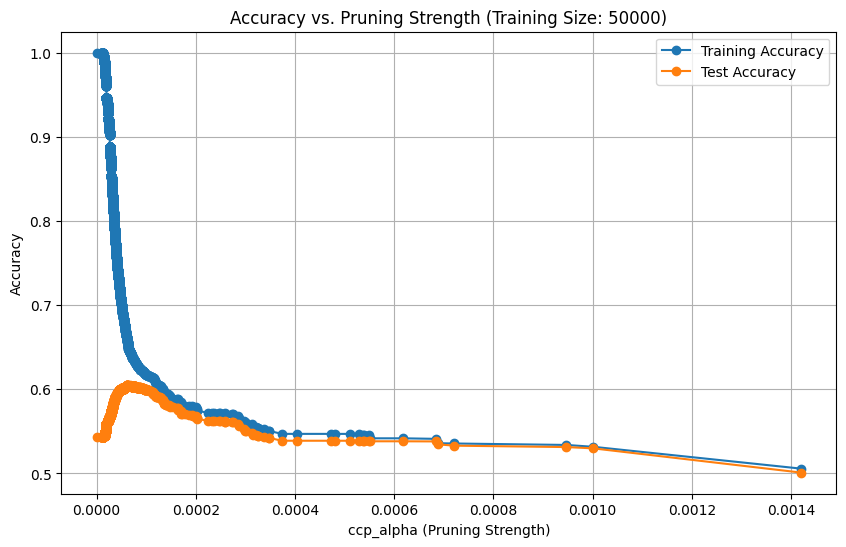

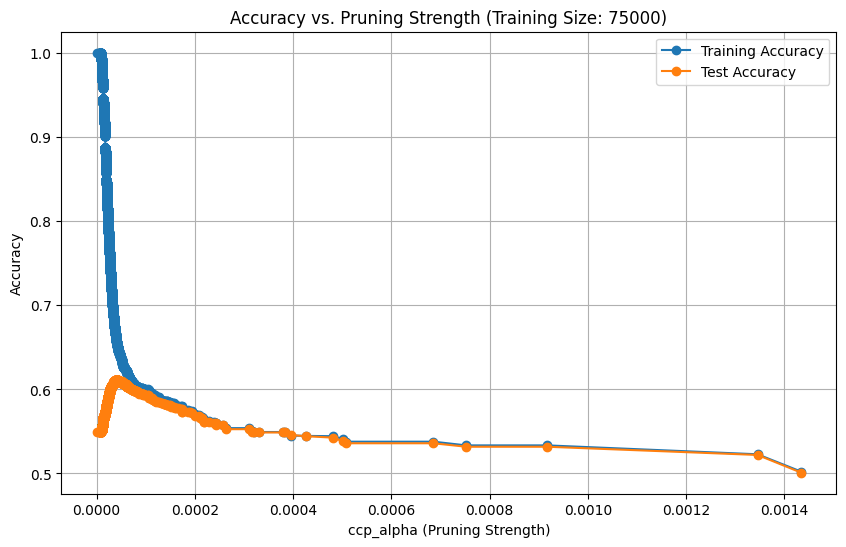

In [ ]:
# Loop through stored datasets and plot graphs
for size, (X_train, X_test, y_train, y_test) in datasets.items():
    # Get effective alpha values for pruning
    pruned_model = DecisionTreeClassifier(random_state=42)
    path = pruned_model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas  # Extract alpha values

    # Initialize lists for accuracies
    train_scores = []
    test_scores = []

    # Train and evaluate the tree for each alpha
    for alpha in ccp_alphas:
        pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
        pruned_model.fit(X_train, y_train)
        
        # Record accuracies for training and test sets
        train_scores.append(pruned_model.score(X_train, y_train))
        test_scores.append(pruned_model.score(X_test, y_test))
    
    # Plot training and test accuracy for the current training size
    plt.figure(figsize=(10, 6))
    plt.plot(ccp_alphas, train_scores, label="Training Accuracy", marker='o')
    plt.plot(ccp_alphas, test_scores, label="Test Accuracy", marker='o')
    plt.xlabel("ccp_alpha (Pruning Strength)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Pruning Strength (Training Size: {size})")
    plt.legend()
    plt.grid()
    plt.show()

## Pruning Results and Analysis

### Observations
1. **Increase in Accuracy**
- In both using 50,000 hands and 75,000 hands in the training set increased the accuracy of the model with the tes data to over 6.0.
- This is a good increase however is not high enough to be in the desired accuracy range for the model,
2. **Unrealistic Pruning Time**
- The times it takes the prune the increased training set takes to long to efficiently work with and see results.
- The training set with 50,000 hands of poker tooke 100 minutes, the 75,000 took over 300 minutes and the 100,000 hands took too long to finish.
- Along with VS code I tried Google Colabs and similar results were seen. It doesn't seem to be a limit on my laptop with CPU, GPU or RAM it more   seems that vs code will not use more than 400mb and there doesn't seem to be a work around
3. **Will need SMOTE**
- As increasing the data set does not seem realistic, SMOTE(Synthetic Minority Oversampling Technique) is going to be implemented.
- SMOTE will allow for increased accuracy on minority classes such as Royal FLush.
- This is done by duplicating the minority examples in the training model. This can balance the class distribution but does not provide any additional information to the model.
---

### Interpretation
1. **Efficiency Challenges**
- Pruning larger datasets, such as 75,000 and 100,000 hands, results in excessive computation times, exceeding practical limits for iterative testing.
- This inefficiency indicates a need for optimised algorithms or alternative approaches to manage computational constraints.

2. **Class Imbalance Issues**
- Minority classes, such as "Royal Flush," remain poorly predicted despite pruning.
- Class imbalance affects the model's ability to generalise, necessitating strategies like SMOTE for better representation of underrepresented classes.

3. **Pruning Impact**
- Moderate pruning (lower ccp_alpha) improves generalisation, with a visible increase in test accuracy (~6.0).
- However, aggressive pruning (higher ccp_alpha) causes underfitting, reducing both training and test accuracy.
--- 
### Conclusion
- Moderate pruning enhances the model's ability to generalise by mitigating overfitting without oversimplifying.
- Addressing class imbalance with SMOTE can complement pruning by improving accuracy for minority classes.
- Computational constraints highlight the importance of scalable solutions or more efficient frameworks for processing large datasets.

In [7]:
# Loop through stored datasets and plot graphs
for size, (X_train, X_test, y_train, y_test) in datasets.items():
    # Get effective alpha values for pruning
    pruned_model = DecisionTreeClassifier(random_state=42)
    path = pruned_model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas  # Extract alpha values

    # Initialize lists for accuracies
    train_scores = []
    test_scores = []

    # Train and evaluate the tree for each alpha
    for alpha in ccp_alphas:
        pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
        pruned_model.fit(X_train, y_train)
        
        # Record accuracies for training and test sets
        train_scores.append(pruned_model.score(X_train, y_train))
        test_scores.append(pruned_model.score(X_test, y_test))

In [8]:
# Select the optimal pruning strength
optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Optimal ccp_alpha: {optimal_alpha}")

# Train the final pruned model
final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the pruned model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Optimal ccp_alpha: 6.274047417807971e-05
Accuracy on Test Data: 0.6048481554035343


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.77      0.69    488420
           1       0.56      0.51      0.54    412201
           2       0.34      0.03      0.06     46475
           3       0.57      0.06      0.11     20564
           4       0.00      0.00      0.00      3775
           5       0.00      0.00      0.00      1942
           6       0.00      0.00      0.00      1386
           7       0.00      0.00      0.00       225
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         8

    accuracy                           0.60    975010
   macro avg       0.21      0.14      0.14    975010
weighted avg       0.58      0.60      0.58    975010



### Current Performance

- **Training Set Size**: 50,000 hands
    
    - A larger training set was used to enhance model learning, especially for underrepresented classes.
        
- **Accuracy**: 60%
    
    - The model's accuracy has improved from the initial 54% to 60%, indicating better performance in correctly classifying the data. However, the improvement is still limited, particularly for minority classes.
        

---

### Classification Report

The updated classification report presents the performance of the decision tree classifier for each class:

|Class|Category|Precision|Recall|F1-Score|Support|
|---|---|---|---|---|---|
|0|Class 0|0.63|0.77|0.69|488420|
|1|Class 1|0.56|0.51|0.54|412201|
|2|Class 2|0.34|0.03|0.06|46475|
|3|Class 3|0.57|0.06|0.11|20564|
|4|Class 4|0.00|0.00|0.00|3775|
|5|Class 5|0.00|0.00|0.00|1942|
|6|Class 6|0.00|0.00|0.00|1386|
|7|Class 7|0.00|0.00|0.00|225|
|8|Class 8|0.00|0.00|0.00|14|
|9|Class 9|0.00|0.00|0.00|8|

**Key Observations**:

1. **Performance Improvement**:
    
    - Classes `0` and `1` show notable improvements in precision, recall, and F1-score, contributing significantly to overall accuracy.
        
    - Accuracy improved by 6% compared to previous results, but rare classes continue to have very low predictive performance.
        
2. **Challenges with Minority Classes**:
    
    - Rare classes (e.g., `4`, `5`, `6`, `7`, `8`, and `9`) still have **precision**, **recall**, and **F1-scores** close to `0.00`.
        
    - This is likely due to class imbalance, where the model lacks sufficient examples to learn meaningful patterns for these classes.
        

---

### Current Problem

- The current training set has increased in size to **50,000 hands**, which improved accuracy but was insufficient to address class imbalance.
    
- Minority classes are still not well represented, leading to poor performance for those classes in terms of recall and F1-score.
    

---

### Plan: Apply SMOTE

- **SMOTE (Synthetic Minority Over-sampling Technique)** will be used to generate synthetic data points for the minority classes.
    
- This approach aims to balance the dataset, allowing the model to learn from more instances of the underrepresented classes.
    

---

### Advantages of Using SMOTE

1. **Improved Representation of Minority Classes**:
    
    - SMOTE will generate synthetic examples, increasing the representation of minority classes such as `4`, `5`, `6`, etc., which will help the model generalise better for these categories.
        
2. **Better Performance Metrics**:
    
    - Balancing the dataset is expected to improve precision, recall, and F1-score for the underrepresented classes, leading to a more effective and generalised model.
        
3. **Enhanced Model Generalisation**:
    
    - By reducing class imbalance, the model will avoid biases towards majority classes, resulting in improved accuracy and performance across all classes.

In [9]:
from imblearn.over_sampling import SMOTE  # Import SMOTE for generating synthetic samples to balance class distribution in the training data

training_size = 50000  # Specify the desired size of the training set

# Calculate the total number of samples in the combined dataset
total_samples = combined_features.shape[0]  # Get the total number of samples

# Calculate the ratio of training samples to total samples
train_ratio = training_size / total_samples  # Ratio of samples to use for training

# Split the combined dataset into training and test sets based on the training ratio
X_train, X_test, y_train, y_test = train_test_split(
    combined_features, combined_target, test_size=(1 - train_ratio), random_state=42
)

# Apply SMOTE to balance the training set by oversampling minority classes
smote = SMOTE(random_state=42,  k_neighbors=2)  # Create an instance of SMOTE with a random seed for reproducibility and Reduce k_neighbors to avoid the error
X_train, y_train = smote.fit_resample(X_train, y_train)  # Apply SMOTE to generate synthetic samples for the training set

# Print the sizes of the balanced training set and the test set
print(f"Training Set Size after SMOTE: {X_train.shape[0]}")  # Size of the training set after applying SMOTE
print(f"Test Set Size: {X_test.shape[0]}")  # Size of the test set

Training Set Size after SMOTE: 227538
Test Set Size: 975010


### Observations:

- **Training Set Size after SMOTE**: Increased from **50,000** to **227,538** samples.
- **Test Set Size**: Remains at **975,010** samples.
- **Significant Increase**: Approximately **177,538 synthetic samples** were generated by SMOTE.

### Interpretation:

- **Training Set Growth**: The substantial increase in training size indicates severe class imbalance in the original data, with SMOTE having to generate many synthetic samples.
- **Overfitting Risk**: The larger training set could cause the model to overfit to synthetic data rather than learning general patterns.
- **Training-Test Imbalance**: The imbalance between training (227,538 samples) and test set sizes (975,010 samples) might affect the model's ability to generalize effectively.

### Conclusion:

- **Adjust SMOTE Strategy**: Consider reducing the number of synthetic samples by using a lower `sampling_strategy` or combining SMOTE with undersampling.
- **Model Complexity**: Control model complexity (e.g., limit tree depth) to avoid overfitting on the expanded training set.
- **Training Time**: Reducing synthetic samples can also help decrease the training time, making the model more practical to use.

In [ ]:
# Train the Decision Tree Classifier on the SMOTE-balanced training set
model = DecisionTreeClassifier(random_state=42)  # Initialize the decision tree model
model.fit(X_train, y_train)  # Train the model on the balanced training set

# Make predictions on the test set
y_pred = model.predict(X_test)  # Predict the target variable for the test set

# Evaluate the model using accuracy and classification report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))  # Print the accuracy on the test set
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Print the classification report for the test set

Accuracy on Test Data: 0.4896206192756997


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59    488420
           1       0.48      0.46      0.47    412201
           2       0.11      0.20      0.14     46475
           3       0.08      0.15      0.11     20564
           4       0.05      0.09      0.06      3775
           5       0.07      0.16      0.10      1942
           6       0.02      0.05      0.03      1386
           7       0.03      0.02      0.02       225
           8       0.02      0.07      0.03        14
           9       0.00      0.00      0.00         8

    accuracy                           0.49    975010
   macro avg       0.15      0.18      0.15    975010
weighted avg       0.52      0.49      0.50    975010



C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


: 

### SMOTE Performance Report

- **Training Set Size after SMOTE**: 227,538
    
- **Test Set Size**: 975,010
    

### Accuracy

- **Accuracy on Test Data**: 48.96%
    

### Classification Report

The updated classification report presents the performance of the decision tree classifier for each class after applying SMOTE:

|Class|Category|Precision|Recall|F1-Score|Support|
|---|---|---|---|---|---|
|0|Class 0|0.62|0.57|0.59|488420|
|1|Class 1|0.48|0.46|0.47|412201|
|2|Class 2|0.11|0.20|0.14|46475|
|3|Class 3|0.08|0.15|0.11|20564|
|4|Class 4|0.05|0.09|0.06|3775|
|5|Class 5|0.07|0.16|0.10|1942|
|6|Class 6|0.02|0.05|0.03|1386|
|7|Class 7|0.03|0.02|0.02|225|
|8|Class 8|0.02|0.07|0.03|14|
|9|Class 9|0.00|0.00|0.00|8|

**Key Observations**:

1. **Improved Representation**
    
    - SMOTE increased the representation of minority classes, providing more balanced data for training.
        
    - However, despite this improvement, minority classes (e.g., `4`, `5`, `6`, `7`, `8`, and `9`) still have very low precision, recall, and F1-scores, indicating continued challenges in predictive performance.
        
2. **Performance Comparison**
    
    - Compared to the original training set of 50,000 hands, applying SMOTE actually led to a decrease in overall accuracy from 60% to 48.96%.
        
    - This drop in accuracy indicates that while SMOTE improved class balance, it may have introduced noise or overfitting, negatively impacting the model's ability to generalize.
        
    - More work is needed to improve the classifier's ability to effectively utilize the synthetic data generated by SMOTE for better generalization.

## **Data Sources**

- **[UCI Machine Learning Repository - Poker Hand Dataset](https://archive.ics.uci.edu/dataset/158/poker+hand)**:
    - This dataset contains **1,000,000 instances** of poker hands, each represented by ten features:
        - **Features**: Suit (`S1`-`S5`) and rank (`R1`-`R5`) of five playing cards.
        - **Target Variable (`Class`)**: Indicates the type of poker hand, ranging from `0` (Nothing) to `9` (Royal Flush).
    - The dataset is split into a **training dataset** with 25,000 hands and a **test dataset** with 1,000,000 hands.

---

## **Pre-Processing**

- **Data Splitting**:
    
    - Merged the original training and test datasets to create a unified dataset.
    - Split the combined data into new training and test sets with varying training sizes (**50,000**, **75,000**, and **100,000 hands**) using Scikit-learn's `train_test_split`.
    - Stratified sampling ensured consistent class distribution across training and test sets.
- **Feature Selection**:
    
    - Selected the ten features (`S1`, `R1`, ..., `S5`, `R5`) representing the suits and ranks of each card.
    - No additional feature engineering was performed.
- **Handling Imbalanced Data**:
    
    - **SMOTE (Synthetic Minority Oversampling Technique)**:
        - Applied SMOTE to the 50,000-hand training set to address class imbalance.
        - Balanced the training data by generating synthetic samples for rare classes.
    - **Class Weighting**:
        - Considered adjusting class weights during model training to improve the recall of minority classes.

---

## **Data Understanding/Visualisation**

- **Class Distribution Analysis**:
    
    - **Highly Imbalanced Classes**:
        - Most hands belong to class `0` (Nothing) and class `1` (One Pair).
        - Rare classes like `8` (Straight Flush) and `9` (Royal Flush) are significantly underrepresented.
    - **Visualization**:
        - Created bar charts to visualize class distribution and confirm the severity of the imbalance.
- **Impact of Imbalance**:
    
    - Imbalanced data leads to biased models that predict majority classes accurately but fail for rare classes.
    - Addressing this imbalance was crucial to improve the model's ability to generalize.

---

## **Algorithms**

- **Decision Tree Classifier**:
    
    - Implemented using Scikit-learn’s `DecisionTreeClassifier`.
    - **Cost Complexity Pruning**:
        - Controlled overfitting by simplifying the tree using the `ccp_alpha` parameter.
        - Evaluated the effect of different pruning strengths (`ccp_alpha`) on training and test accuracy.
- **Model Training and Evaluation**:
    
    - Trained models on datasets with varying training sizes (**50k**, **75k**, **100k**) to analyze scalability and performance.
    - Applied SMOTE to the 50,000-hand training set to address class imbalance.
- **Alternative Approaches**:
    
    - **Class Weighting**:
        - Adjusted class weights in the decision tree model to give more importance to rare classes.
    - **Explored Random Forests**:
        - Considered Random Forests as a potential alternative due to their ability to handle imbalanced datasets better.

---

## **Results**

- **Initial Model Performance (Without Pruning)**:
    
    - The unpruned decision tree achieved **perfect accuracy** on training data but performed poorly on test data, indicating overfitting.
- **Pruning Analysis**:
    
    - **Optimal `ccp_alpha`**:
        - Identified an optimal pruning strength where test accuracy peaked at **~54%**.
    - **Accuracy vs. Pruning Strength**:
        - Excessive pruning led to underfitting, causing both training and test accuracies to decline.
- **Increasing Training Set Size**:
    
    - Increasing the training set size to **50,000 hands** improved test accuracy to approximately **60%**.
    - Further increases to **75,000** and **100,000 hands** showed diminishing returns.
- **SMOTE Results**:
    
    - **Impact on Accuracy**:
        - SMOTE reduced overall test accuracy to **~49%**, highlighting challenges in generalizing to test data after oversampling.
    - **Minority Class Performance**:
        - While SMOTE balanced the training data, the model still struggled to predict rare classes effectively.
- **Classification Report Highlights**:
    
    - **Majority Classes** (`0`, `1`):
        - Achieved better precision and recall due to their prevalence in the dataset.
    - **Minority Classes** (`8`, `9`):
        - Precision and recall remained close to zero, reflecting the model’s difficulty in learning these rare classes.

---

## **Online Resources & Sources**

- **[UCI Machine Learning Repository - Poker Hand Dataset](https://archive.ics.uci.edu/dataset/158/poker+hand)**:
    - Provided the dataset for this project.
- **[Scikit-learn Documentation](https://scikit-learn.org/)**:
    - Assisted in implementing decision trees, pruning, and evaluation metrics.
- **[Machine Learning Mastery - SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)**:
    - Helped apply SMOTE to handle class imbalance.
- **[Matplotlib Documentation](https://matplotlib.org/)**:
    - Used for creating visualizations of class distributions and model performance.

---

## **Tools & Technologies Used**

- **Python Libraries**:
    - `Pandas` and `NumPy`: Data preprocessing and manipulation.
    - `Scikit-learn`: Implemented decision trees, pruning, and evaluation metrics.
    - `Imbalanced-Learn`: Applied SMOTE for oversampling minority classes.
- **Visualization**:
    - `Matplotlib`: Plotted class distributions and pruning results.
- **Development Environment**:
    - **Jupyter Notebook**: Used for interactive data analysis and model training.

## **Challenges Faced**

1. **Class Imbalance**:
    
    - The dataset was heavily imbalanced, with most samples in classes `0` and `1`.
    - Techniques like SMOTE and class weighting improved balance but did not fully resolve performance issues for rare classes.
2. **Computational Overhead**:
    
    - Increasing the training set size to 100,000 hands and applying pruning led to longer training times.
    - Pruning became computationally expensive for larger datasets.
3. **SMOTE Trade-Offs**:
    
    - While SMOTE balanced the training data, it introduced synthetic samples that reduced overall test accuracy.
    - The model failed to generalize well to the test set after SMOTE application.
4. **Pruning Complexity**:
    
    - Finding the optimal `ccp_alpha` required extensive experimentation and visualizations.
    - Over-pruned models underfit the data, losing predictive power.
5. **Rare Class Predictions**:
    
    - Despite balancing efforts, the model struggled to predict rare classes like `8` (Straight Flush) and `9` (Royal Flush).
    - These classes consistently had near-zero precision and recall.